# AI4I 2020 Predictive Maintenance Dataset Data Set

<b>Abstract:</b> The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.

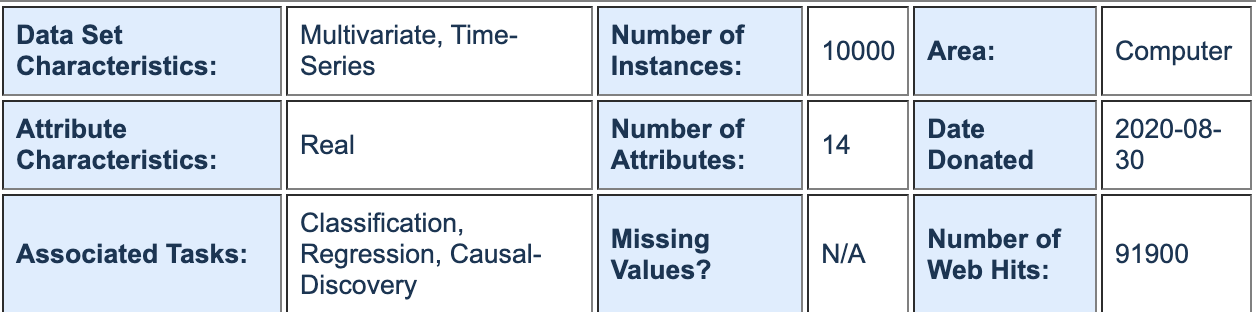

<b>Source:<b>

Stephan Matzka, School of Engineering - Technology and Life, Hochschule fÃ¼r Technik und Wirtschaft Berlin, 12459 Berlin, Germany, stephan.matzka '@' htw-berlin.de

<b>Data Set Information:

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

<b>Attribute Information:

The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

<b> Relevant Papers:

Stephan Matzka, 'Explainable Artificial Intelligence for Predictive Maintenance Applications', Third International Conference on Artificial Intelligence for Industries (AI4I 2020), 2020 (in press)

## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

Numpy is a library for linear algebra, which allows for efficient manipulation of arrays and matrices.

Pandas is a library for data processing and analysis, specifically for working with data in the form of tables (such as CSV files). It allows for easy manipulation and analysis of data using data structures like DataFrames and Series.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Seaborn is a library built on top of matplotlib that provides a higher-level interface for creating statistical plots and visualizations. It also has a lot of built-in themes and color schemes that make it easier to create visually appealing plots.

Matplotlib is a library for creating static, animated, and interactive visualizations in Python. It is the foundation for many other data visualization libraries in Python, including seaborn.

The last line of code uses the warnings library to filter out any warning messages generated by the code. This is done to keep the output clean and easy to read, and it doesn't affect the execution of the code.

In [3]:
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

The first line uses the seaborn set_theme() function to set the default theme for all plots created using seaborn. It sets the color palette to 'tab10', which is a predefined color palette with 10 colors. It also sets the font to 'Lucida Calligraphy' and the font scale to 1.5, which means the text in the plots will be 1.5 times larger than the default size.

The second line imports the matplotlib library and updates the font size parameter to 15. This means that all text in matplotlib plots will be 15 points in size.

The last line uses the matplotlib style.use() function to set the background color of all plots to 'dark_background'. This will change the background color of all plots to a dark color, making it easier to read the text and data points on the plots.

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

The first line uses the pandas set_option() function to set the maximum number of columns to be displayed to None. This means that all columns in a DataFrame will be displayed, regardless of how many columns it has.

The second line uses the pandas set_option() function to set the maximum number of rows to be displayed to None. This means that all rows in a DataFrame will be displayed, regardless of how many rows it has.

These options are useful when working with large DataFrames that have many columns and rows, and can help to avoid truncation of data when viewing it in the console.

## Data cleaning and pre-processing

In [5]:
df = pd.read_csv('./ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


This code reads in a CSV file called 'ai4i2020.csv' and assigns it to a variable called 'df'. It then uses the head() function to display the first five rows of the DataFrame.

The read_csv() function is used to read in a CSV file and convert it into a DataFrame. The first argument passed to the function is the path of the file, in this case './ai4i2020.csv'. The file is read and stored in the 'df' variable.

The head() function is used to display the first five rows of the DataFrame. By default, the head() function shows the first five rows, but you can also specify the number of rows to display by passing an integer value as an argument, for example: df.head(10) will show first 10 rows of the DataFrame.

In [6]:
df.sample(6).style.set_properties(
    **{
        'background-color': 'Brown',
        'color': 'white',
        'border-color': 'White'
    })

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
8429,8430,L55609,L,299.000000,310.300000,1577,40.000000,181,0,0,0,0,0,0
3284,3285,H32698,H,301.200000,309.900000,1362,50.700000,25,0,0,0,0,0,0
5795,5796,M20655,M,301.900000,311.400000,1465,39.900000,153,0,0,0,0,0,0
727,728,H30141,H,297.300000,308.600000,1499,37.600000,147,0,0,0,0,0,0
6508,6509,H35922,H,301.000000,310.100000,1756,30.700000,2,0,0,0,0,0,0
8380,8381,L55560,L,298.900000,310.000000,1776,25.700000,51,0,0,0,0,0,0


This code selects a random sample of 6 rows from the DataFrame 'df' and applies some styling to the cells of the selected rows.

The sample() function is used to select a random sample of rows from the DataFrame. The number of rows to select is passed as an argument, in this case 6. The style property is used to format cells of the selected rows.

The set_properties() function is used to apply the styling to the cells of the selected rows. It takes a dictionary of CSS properties as an argument. In this case, the properties set the background color of the cells to 'Brown', the text color to 'white', and the border color to 'White'. These styles are applied to the randomly selected 6 rows.

In [7]:
df = df.drop(["UDI","Product ID"],axis=1)

The drop() function is used to remove one or more columns or rows from a DataFrame. In this case, the function is called on the 'df' variable and the columns "UDI" and "Product ID" are passed as an argument. The 'axis' parameter is set to 1, which means that columns are being dropped. The function removes the specified columns from the DataFrame and assigns the modified DataFrame to the same variable 'df'. This means that the original DataFrame will be modified and the columns "UDI" and "Product ID" will no longer be present in it.

UDI and Product ID is dropped because those are unique values which has no correlation between any

In [8]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

The first line of code subtracts 272.15 from the values in the "Air temperature [K]" column, and assigns the result to the same column. This converts the temperature values from Kelvin to Centigrade because 1 Kelvin is equivalent to -272.15 degree Centigrade.

The second line of code performs the same conversion for the "Process temperature [K]" column.

The last line of code uses the rename() function to rename the columns from "Air temperature [K]" and "Process temperature [K]" to "Air temperature [°C]" and "Process temperature [°C]", respectively. The inplace=True parameter ensures that the changes are made in the original dataframe, rather than creating a new one.

In [9]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature difference [°C]
3229,L,28.45,37.25,1442,43.2,96,0,0,0,0,0,0,8.8
2581,L,27.05,36.95,1345,60.7,191,1,0,0,0,1,0,9.9
5582,L,30.35,39.85,2052,18.9,40,0,0,0,0,0,0,9.5
3423,L,29.25,38.25,1496,35.2,153,0,0,0,0,0,0,9.0
6239,L,29.05,38.55,1644,31.6,166,0,0,0,0,0,0,9.5


The first line of code uses the subtraction operator to subtract the values in the "Air temperature [°C]" column from the "Process temperature [°C]" column. The result is assigned to the new column "Temperature difference [°C]".

The second line of code uses the sample() function to select a random sample of 5 rows from the modified DataFrame and display it. This allows for a quick way to check the new column and the values it holds.

In [10]:
display(df.shape)
display(df.size)

(10000, 13)

130000

The first line of code uses the shape attribute of the DataFrame to return a tuple representing the dimensions of the DataFrame. The first element of the tuple represents the number of rows and the second element represents the number of columns.

The second line of code uses the size attribute of the DataFrame to return the total number of elements in the DataFrame, which is the product of the number of rows and the number of columns.

Both of these attributes are useful for getting a general idea of the size of the DataFrame and can be used to check if the DataFrame contains the expected number of rows and columns. The display function is used here to show the results in the output.

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Machine failure              10000 non-null  int64  
 7   TWF                          10000 non-null  int64  
 8   HDF                          10000 non-null  int64  
 9   PWF                          10000 non-null  int64  
 10  OSF                          10000 non-null  int64  
 11  RNF                          10000 non-null  int64  
 12  Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), in

The number of rows and columns
The name of each column
The data type of each column
The number of non-null values in each column
The amount of memory used by the DataFrame
This information can be useful for quickly understanding the structure and contents of the DataFrame, and for identifying any potential issues with the data such as missing values. It also helps to identify the datatype of columns which is important for further analysis.

In [12]:
df.describe().style.background_gradient(cmap="Dark2")

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.001900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.043550,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.100000


In [13]:
df.isnull().any()

Type                           False
Air temperature [°C]           False
Process temperature [°C]       False
Rotational speed [rpm]         False
Torque [Nm]                    False
Tool wear [min]                False
Machine failure                False
TWF                            False
HDF                            False
PWF                            False
OSF                            False
RNF                            False
Temperature difference [°C]    False
dtype: bool

The isnull() function returns a DataFrame with the same shape as the original DataFrame, but with boolean values indicating whether the corresponding value in the original DataFrame is missing or not. In this case, the function is applied to the entire DataFrame, resulting in a DataFrame with the same number of rows and columns as the original DataFrame, but with boolean values indicating whether each value is missing or not.

The any() function is then applied to this boolean DataFrame, which returns a boolean value for each column indicating whether any missing values are present in that column. This can be useful for quickly identifying which columns have missing values, and how many.

Alternatively, you can use df.isna().sum() to get the count of missing values in each column.

In [15]:
df.to_csv('data.csv')